# Machine Learning for Asset Managers

##  Chapter 3 Distance Metrics

### Snippet 3.1 Marginal, Joint, Conditional Entropies, and Mutual Information

In [57]:
import numpy as np
import scipy.stats as ss
from sklearn.metrics import mutual_info_score

In [58]:
# Define a variable in CH 02
x = np.random.normal(loc = 0, scale = 1, size =1000)
y = np.array(range(1000))/500
bins = 100

cXY = np.histogram2d(x, y, bins)[0]
hX = ss.entropy(np.histogram(x, bins)[0])  # Marginal
hY = ss.entropy(np.histogram(y, bins)[0])  # Marginal

iXY = mutual_info_score(labels_true = None, labels_pred = None, contingency =cXY)
iXYn = iXY / min(hX, hY) #normalized mutual information

hXY = hX + hY - iXY # joint
hX_Y = hXY - hY # conditional
hY_X = hXY - hX # conditional

In [59]:
print(' Entropy of X H[X] :', hX , '\n',
     'Entropy of X H[Y] :', hY , '\n\n',
     'Mutual Information Score :', iXY , '\n',
     'Normalized Mutual Info Score :', iXYn , '\n\n',
     'Joint Entropy H[X,Y] :', hXY , '\n',
     'Conditional Entropy H[X|Y] :', hX_Y , '\n',
     'Conditional Entropy H[Y|X] :', hY_X , '\n')

 Entropy of X H[X] : 4.115591495140774 
 Entropy of X H[Y] : 4.60517018598809 

 Mutual Information Score : 1.9138660924348887 
 Normalized Mutual Info Score : 0.4650281969662358 

 Joint Entropy H[X,Y] : 6.806895588693974 
 Conditional Entropy H[X|Y] : 2.2017254027058843 
 Conditional Entropy H[Y|X] : 2.6913040935532004 



### Snippet 3.2 Mutual Information, Variation of Information, and Normalized Variation of Information

In [60]:
def varInfo(x, y, bins, norm=False):
    # Variation of Information
    cXY = np.histogram2d(x, y, bins)[0]
    iXY = mutual_info_score(None, None, contingency = cXY)
    
    hX = ss.entropy(np.histogram(x, bins)[0]) # Marginal
    hY = ss.entropy(np.histogram(y, bins)[0]) # Marginal
    vXY = hX + hY - 2 * iXY # Variation of Information
    
    if norm :
        hXY = hX + hY - iXY # Joint
        vXY /= hXY # Normalized Variation of Information
        
    return vXY

### Snippet 3.3 Varation of Information on Discretized Continuous Random Variables

In [68]:
def numBins(nObs, corr=None):
    # Optimal number of bins for discretization
    if corr is None : # univariate case
        z = (8 + 324*nObs + 12*(36*nObs + 729*nObs**2)**0.5)**(1/3)
        b = round(z/6 + 2/(3*z) + 1/3)
    else : # bivariate case
        b = round(2**(-0.5) * (1 + (1 + 24*nObs/(1 - corr**2))**0.5)**0.5)
    
    return int(b)
        

def varInfo(x, y, norm=False) :
    # Variation of Information
    bXY = numBins(x,shape[0], corr = np.corrcoef(x,y)[0,1])
    cXY = np.histogram2d(x, y, bXY)[0]
    iXY = mutual_info_score(None, None, contingency = cXY)
    
    hX = ss.entropy(np.histogram(x,bXY)[0])  # Marginal
    hY = ss.entropy(np.histogram(Y,bXY)[0])  # Marginal
    vXY = hX + hY - 2*iXY # Variation of Information
    
    if norm :
        hXY = hX + hY - iXY # Joint
        vXY /= hXY # Normalized Variation of Information
    
    return vXY

### Snippet 3.4 Correlation and Normalized Mutual Information of Two Independent Gaussian Random Variables

In [72]:
def mutualInfo(x, y, norm=False):
    # Mutual Information
    bXY = numBins(x.shape[0], corr=np.corrcoef(x,y)[0,1])
    cXY = np.histogram2d(x, y, bXY)[0]
    iXY = mutual_info_score(None, None, contingency=cXY)
    
    if norm :
        hX = ss.entropy(np.histogram(x, bXY)[0]) # Marginal
        hY = ss.entropy(np.histogram(y, bXY)[0]) # Marginal
        iXY /= min(hX, hY) # Normalized mutual information
    return iXY

### Exercise

In [73]:
size = 5000
seed = 0

np.random.seed(seed)
x = np.random.normal(size = size)
e = np.random.normal(size = size)

y = 0 * x + e

nmi = mutualInfo(x, y, True)
corr = np.corrcoef(x,y)[0,1]
                   
print("Normalized Mutual Info : ", nmi)
print("Correlation : ", corr)

Normalized Mutual Info :  0.006764619108279091
Correlation :  0.001496837406727644


### Graphs

#### Figure 3.2 Scatterplot of two independent Gaussian random variables

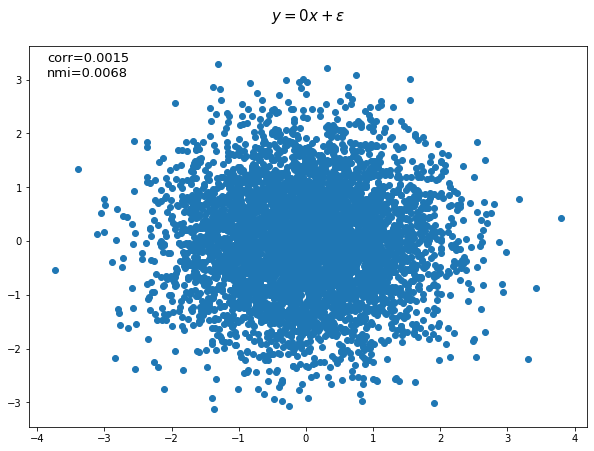

In [104]:
import matplotlib.pyplot as plt

size = 5000
seed = 0

np.random.seed(seed)
x = np.random.normal(size = size)
e = np.random.normal(size = size)

y = 0 * x + e


nmi = mutualInfo(x, y, True)
corr = np.corrcoef(x,y)[0,1]


fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(x, y)
ax.set_title('$y=0x+\epsilon$\n', fontsize = 15)
plt.figtext(0.15, 0.85, "corr={0:.4f}".format(corr), fontsize = 13)
plt.figtext(0.15, 0.82, "nmi={0:.4f}".format(nmi), fontsize = 13)
plt.show()

#### Figure 3.3 Scatterplot of two Gaussian random variables with a linear relationship

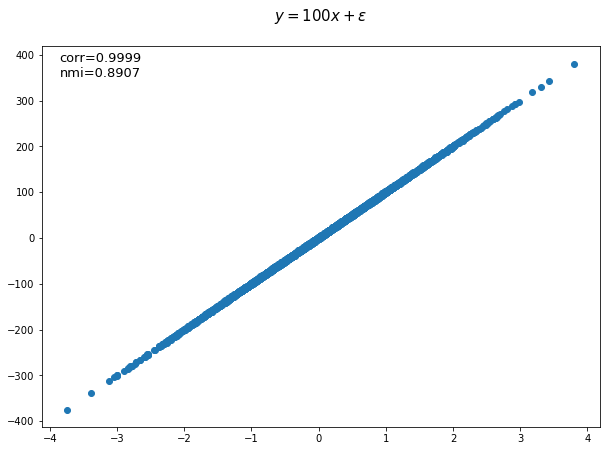

In [105]:
import matplotlib.pyplot as plt

size = 5000
seed = 0

np.random.seed(seed)
x = np.random.normal(size = size)
e = np.random.normal(size = size)

y = 100 * x + e


nmi = mutualInfo(x, y, True)
corr = np.corrcoef(x,y)[0,1]


fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(x, y)
ax.set_title('$y=100x+\epsilon$\n', fontsize = 15)
plt.figtext(0.15, 0.85, "corr={0:.4f}".format(corr), fontsize = 13)
plt.figtext(0.15, 0.82, "nmi={0:.4f}".format(nmi), fontsize = 13)
plt.show()

#### Figure 3.4 Scatterplot of two Gaussian random variables with a nonlinear relationship

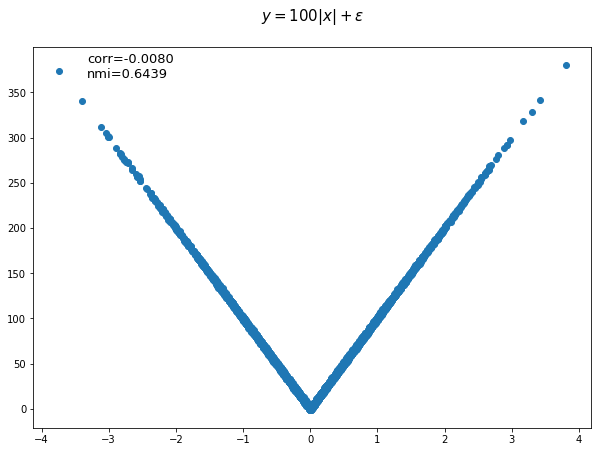

In [107]:
import matplotlib.pyplot as plt

size = 5000
seed = 0

np.random.seed(seed)
x = np.random.normal(size = size)
e = np.random.normal(size = size)

y = 100 * np.abs(x) + e


nmi = mutualInfo(x, y, True)
corr = np.corrcoef(x,y)[0,1]


fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(x, y)
ax.set_title('$y=100|x|+\epsilon$\n', fontsize = 15)
plt.figtext(0.2, 0.85, "corr={0:.4f}".format(corr), fontsize = 13)
plt.figtext(0.2, 0.82, "nmi={0:.4f}".format(nmi), fontsize = 13)
plt.show()